In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,precision_recall_curve,f1_score,auc,average_precision_score,roc_curve,roc_auc_score,average_precision_score
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib 

matplotlib.style.use('ggplot')

In [2]:
# This DataFrame will be used for Regression
twitterDataReg = pd.read_csv("twitter.data",sep=',',header = None,skipinitialspace=True)
# This DataFrame will be used for Classification
twitterDataClass = pd.read_csv("Twitter-Absolute-Sigma-500.data",header = None,skipinitialspace=True)

In [3]:
# Creating list of Column names as mentioned in description file.
columns = ['NCD_0','NCD_1','NCD_2','NCD_3','NCD_4','NCD_5','NCD_6','AI_0','AI_1','AI_2','AI_3','AI_4','AI_5','AI_6','AS(NA)_0','AS(NA)_1','AS(NA)_2','AS(NA)_3','AS(NA)_4','AS(NA)_5','AS(NA)_6','BL_0','BL_1','BL_2','BL_3','BL_4','BL_5','BL_6','NAC_0','NAC_1','NAC_2','NAC_3','NAC_4','NAC_5','NAC_6','AS(NAC)_0','AS(NAC)_1','AS(NAC)_2','AS(NAC)_3','AS(NAC)_4','AS(NAC)_5','AS(NAC)_6','CS_0','CS_1','CS_2','CS_3','CS_4','CS_5','CS_6','AT_0','AT_1','AT_2','AT_3','AT_4','AT_5','AT_6','NA_0','NA_1','NA_2','NA_3','NA_4','NA_5','NA_6','ADL_0','ADL_1','ADL_2','ADL_3','ADL_4','ADL_5','ADL_6','NAD_0','NAD_1','NAD_2','NAD_3','NAD_4','NAD_5','NAD_6','Buzz']

In [4]:
twitterDataReg.columns  = columns
twitterDataClass.columns = columns

In [5]:
X_data = pd.DataFrame(twitterDataClass.loc[:,twitterDataReg.columns!='Buzz'])
Y_data = pd.DataFrame(twitterDataClass['Buzz'])

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train_FR,X_test_FR,y_train_FR,y_test_FR = train_test_split(X_data,Y_data,random_state = 0)
stdscaler = StandardScaler()
X_train_FR = stdscaler.fit_transform(X_train_FR)
X_test_FR = stdscaler.transform(X_test_FR)

In [7]:
X_train_FR = pd.DataFrame(X_train_FR,columns=['NCD_0','NCD_1','NCD_2','NCD_3','NCD_4','NCD_5','NCD_6','AI_0','AI_1','AI_2','AI_3','AI_4','AI_5','AI_6','AS(NA)_0','AS(NA)_1','AS(NA)_2','AS(NA)_3','AS(NA)_4','AS(NA)_5','AS(NA)_6','BL_0','BL_1','BL_2','BL_3','BL_4','BL_5','BL_6','NAC_0','NAC_1','NAC_2','NAC_3','NAC_4','NAC_5','NAC_6','AS(NAC)_0','AS(NAC)_1','AS(NAC)_2','AS(NAC)_3','AS(NAC)_4','AS(NAC)_5','AS(NAC)_6','CS_0','CS_1','CS_2','CS_3','CS_4','CS_5','CS_6','AT_0','AT_1','AT_2','AT_3','AT_4','AT_5','AT_6','NA_0','NA_1','NA_2','NA_3','NA_4','NA_5','NA_6','ADL_0','ADL_1','ADL_2','ADL_3','ADL_4','ADL_5','ADL_6','NAD_0','NAD_1','NAD_2','NAD_3','NAD_4','NAD_5','NAD_6'])

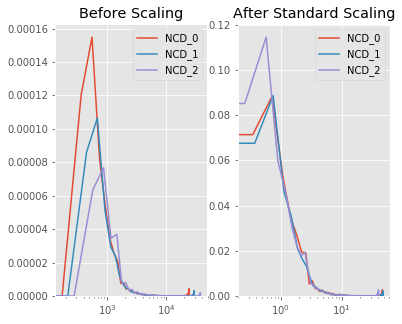

In [8]:
%matplotlib inline

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title("Before Scaling")
#sns.distplot(twitterDataReg['NCD_0'], hist=False, rug=True)
sns.kdeplot(twitterDataReg['NCD_0'],ax=ax1)
sns.kdeplot(twitterDataReg['NCD_1'],ax=ax1)
sns.kdeplot(twitterDataReg['NCD_2'],ax=ax1)
ax1.set_xscale('log')
ax2.set_title("After Standard Scaling")
#sns.distplot(X_train['NCD_0'], hist=False, rug=True)
sns.kdeplot(X_train_FR['NCD_0'],ax=ax2)
sns.kdeplot(X_train_FR['NCD_1'],ax=ax2)
sns.kdeplot(X_train_FR['NCD_2'],ax=ax2)
ax2.set_xscale('log')

In [9]:
X_train_FR1,X_test_FR1,y_train_FR1,y_test_FR1 = train_test_split(X_data,Y_data,random_state = 0)
mmscaler = MinMaxScaler()
X_train_FR1 = mmscaler.fit_transform(X_train_FR1)
X_test_FR1 = mmscaler.transform(X_test_FR1)

In [10]:
X_train_FR1 = pd.DataFrame(X_train_FR1,columns=['NCD_0','NCD_1','NCD_2','NCD_3','NCD_4','NCD_5','NCD_6','AI_0','AI_1','AI_2','AI_3','AI_4','AI_5','AI_6','AS(NA)_0','AS(NA)_1','AS(NA)_2','AS(NA)_3','AS(NA)_4','AS(NA)_5','AS(NA)_6','BL_0','BL_1','BL_2','BL_3','BL_4','BL_5','BL_6','NAC_0','NAC_1','NAC_2','NAC_3','NAC_4','NAC_5','NAC_6','AS(NAC)_0','AS(NAC)_1','AS(NAC)_2','AS(NAC)_3','AS(NAC)_4','AS(NAC)_5','AS(NAC)_6','CS_0','CS_1','CS_2','CS_3','CS_4','CS_5','CS_6','AT_0','AT_1','AT_2','AT_3','AT_4','AT_5','AT_6','NA_0','NA_1','NA_2','NA_3','NA_4','NA_5','NA_6','ADL_0','ADL_1','ADL_2','ADL_3','ADL_4','ADL_5','ADL_6','NAD_0','NAD_1','NAD_2','NAD_3','NAD_4','NAD_5','NAD_6'])

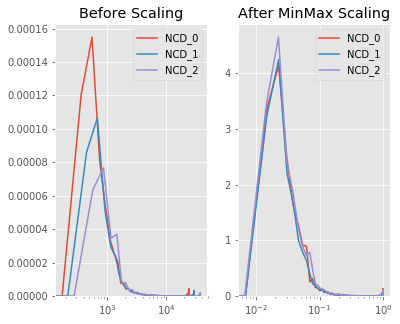

In [11]:
%matplotlib inline

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title("Before Scaling")
sns.kdeplot(twitterDataReg['NCD_0'],ax=ax1)
sns.kdeplot(twitterDataReg['NCD_1'],ax=ax1)
sns.kdeplot(twitterDataReg['NCD_2'],ax=ax1)
ax1.set_xscale('log')
ax2.set_title("After MinMax Scaling")
sns.kdeplot(X_train_FR1['NCD_0'],ax=ax2)
sns.kdeplot(X_train_FR1['NCD_1'],ax=ax2)
sns.kdeplot(X_train_FR1['NCD_2'],ax=ax2)
ax2.set_xscale('log')
plt.show()

# EDA on Classification

In [12]:
from sklearn.model_selection import train_test_split
X_w, sampled_X, Y_w, sampled_y = train_test_split(X_data, Y_data, shuffle = True, test_size = 0.01, random_state=42)
#Sampling the dataset so that it doesn't take a lot of time for processing

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
sampled_X = scaler.fit_transform(sampled_X)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sampled_X, sampled_y, shuffle = True, test_size = 0.30, random_state=42)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


log_clf = LogisticRegression()
log_clf.fit(X_train, y_train.values.ravel())
knn_clf = KNeighborsClassifier(7)
knn_clf.fit(X_train, y_train.values.ravel())
svm_clf = SVC(C = 10, probability = True)
svm_clf.fit(X_train, y_train.values.ravel())

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('svc', svm_clf)], voting='hard')
voting_clf.fit(X_train, y_train.values.ravel())

from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train.values.ravel())
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8959810874704491
KNeighborsClassifier 0.9479905437352246
SVC 0.8794326241134752
VotingClassifier 0.8959810874704491


C:\Users\shmbh\Anaconda4\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# Soft Voting

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


log_clf = LogisticRegression()
log_clf.fit(X_train, y_train.values.ravel())
knn_clf = KNeighborsClassifier(7)
knn_clf.fit(X_train, y_train.values.ravel())
svm_clf = SVC(C = 10, probability = True)
svm_clf.fit(X_train, y_train.values.ravel())

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('svc', svm_clf)], voting='soft')
voting_clf.fit(X_train, y_train.values.ravel())

from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train.values.ravel())
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8959810874704491
KNeighborsClassifier 0.9479905437352246
SVC 0.8794326241134752
VotingClassifier 0.966903073286052


C:\Users\shmbh\Anaconda4\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# Bagging

In [17]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=42)
bag_dtclf = BaggingClassifier(dt_clf, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)

bag_dtclf.fit(X_train, y_train.values.ravel())
y_bag_dtclf_pred = bag_dtclf.predict(X_test)

In [18]:
print('Train score: {:.2f}'.format(bag_dtclf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_dtclf.score(X_test, y_test)))

Train score: 0.97
Test score: 0.97


In [19]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import LinearSVC

svc_lin = LinearSVC(random_state=42)
bag_linsvc = BaggingClassifier(svc_lin, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)

bag_linsvc.fit(X_train, y_train.values.ravel())
y_bag_linsvc_pred = bag_linsvc.predict(X_test)

In [20]:
print('Train score: {:.2f}'.format(bag_linsvc.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_linsvc.score(X_test, y_test)))

Train score: 0.94
Test score: 0.96


# Pasting

In [21]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=42)
bag_dtclf = BaggingClassifier(dt_clf, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=42)

bag_dtclf.fit(X_train, y_train.values.ravel())
y_bag_dtclf_pred = bag_dtclf.predict(X_test)

print('Train score: {:.2f}'.format(bag_dtclf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_dtclf.score(X_test, y_test)))

Train score: 0.97
Test score: 0.97


In [22]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import LinearSVC

svc_lin = LinearSVC(random_state=42)
bag_linsvc = BaggingClassifier(svc_lin, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=42)

bag_linsvc.fit(X_train, y_train.values.ravel())
y_bag_linsvc_pred = bag_linsvc.predict(X_test)

print('Train score: {:.2f}'.format(bag_linsvc.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_linsvc.score(X_test, y_test)))

Train score: 0.94
Test score: 0.96


Since pasting is without replacement, each subset of the sample can be used once at most, which means that you need
a big dataset for it to work. As a matter of fact, pasting was originally designed for large data-sets, when
computing power is limited. Bagging, on the other hand, can use the same subsets many times, which is great for
smaller sample sizes, in which it improves robustness. In our data set pasting can be uselful as we have large data set to work on. Both Pasting and Bagging are giving almost the same accuracies.

# Ada Boosting

In [23]:
from sklearn.ensemble import AdaBoostClassifier

ada_dtclf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=0)
ada_dtclf.fit(X_train, y_train.values.ravel())

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=200, random_state=0)

In [24]:
print('Train score: {:.2f}'.format(ada_dtclf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(ada_dtclf.score(X_test, y_test)))

Train score: 1.00
Test score: 0.96


In [25]:
from sklearn import linear_model

logistic = linear_model.LogisticRegression()

ada_logclf = AdaBoostClassifier(logistic, n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=0)
ada_logclf.fit(X_train, y_train.values.ravel())

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          learning_rate=0.5, n_estimators=200, random_state=0)

In [26]:
print('Train score: {:.2f}'.format(ada_logclf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(ada_logclf.score(X_test, y_test)))

Train score: 0.85
Test score: 0.83


# Boosting

In [27]:
from  sklearn.ensemble import GradientBoostingClassifier

gbcl = GradientBoostingClassifier(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbcl.fit(X_train, y_train.values.ravel())

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=3, presort='auto',
              random_state=42, subsample=1.0, verbose=0, warm_start=False)

In [28]:
print('Train score: {:.2f}'.format(gbcl.score(X_train, y_train)))
print('Test score: {:.2f}'.format(gbcl.score(X_test, y_test)))

Train score: 0.98
Test score: 0.97


# PCA

In [29]:
from sklearn.decomposition import PCA

pca = PCA(.95)
X_PCAtrans = pca.fit_transform(sampled_X)

In [30]:
variance_ratio=pca.explained_variance_ratio_

In [31]:
variance_ratio

array([0.4457274 , 0.15261471, 0.08973188, 0.08509286, 0.07617618,
       0.05183551, 0.03582764, 0.03518158])

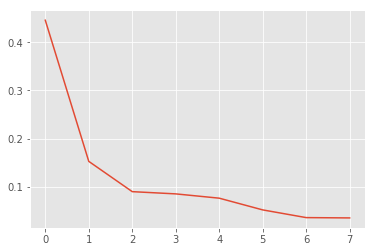

In [32]:
import matplotlib.pyplot as plt
plt.plot(variance_ratio)

From the given plot it appears that the best possible components for the PCA decomposition is 9.

In [33]:
pca = PCA(n_components = 9)
X_PCAtrans = pca.fit_transform(sampled_X)
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_PCAtrans, sampled_y, shuffle = True, test_size = 0.30, random_state=42)

# knn classifier with PCA`

In [34]:
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import roc_auc_score

k_range = list(range(1, 16))
param_grid = dict(n_neighbors=k_range)
knn = KNeighborsClassifier(n_neighbors=k_range)
grid_knnclf = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid_knnclf.fit(X_pca_train, y_pca_train.values.ravel())
print(grid_knnclf.best_score_)
print(grid_knnclf.best_params_)

C:\Users\shmbh\Anaconda4\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\shmbh\Anaconda4\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


0.9512690355329949
{'n_neighbors': 5}


In [35]:
y_knn_predict = grid_knnclf.predict(X_pca_test)
y_knn_train_predict = grid_knnclf.predict(X_pca_train)

In [36]:
report_table = [['knn', 'k = 5', grid_knnclf.score(X_pca_train, y_pca_train), grid_knnclf.score(X_pca_test, y_pca_test), roc_auc_score(y_knn_train_predict, y_pca_train), roc_auc_score(y_knn_predict, y_pca_test) ]]
report_table

[['knn',
  'k = 5',
  0.9634517766497462,
  0.9527186761229315,
  0.941027212166918,
  0.9400461350974929]]

# Logistic Regression with PCA

In [37]:
from sklearn import linear_model

logistic = linear_model.LogisticRegression()
penalty = ['l1', 'l2']
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
hyperparameters = dict(C=C, penalty=penalty)
grid_lg = GridSearchCV(logistic, hyperparameters, cv=5, scoring='accuracy')
grid_lg.fit(X_pca_train, y_pca_train.values.ravel())
print(grid_lg.best_score_)
print(grid_lg.best_params_)

0.9604060913705583
{'C': 100, 'penalty': 'l2'}


In [38]:
lg_predict = grid_lg.predict(X_pca_test)
lg_train_predict = grid_lg.predict(X_pca_train)

In [39]:
report_table =report_table + [['lg', 'C=100, Penalty=12', grid_lg.score(X_pca_train, y_pca_train), grid_lg.score(X_pca_test, y_pca_test), roc_auc_score(lg_train_predict, y_pca_train), roc_auc_score(lg_predict, y_pca_test) ]]
report_table

[['knn',
  'k = 5',
  0.9634517766497462,
  0.9527186761229315,
  0.941027212166918,
  0.9400461350974929],
 ['lg',
  'C=100, Penalty=12',
  0.9634517766497462,
  0.9645390070921985,
  0.9550435279486403,
  0.9660714285714286]]

# Linear SVC with PCA

In [40]:
from sklearn.svm import LinearSVC

svc_lin = LinearSVC()
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}

grid_svc_lin = GridSearchCV(svc_lin, param_grid, cv = 10, scoring='accuracy')
grid_svc_lin.fit(X_pca_train,y_pca_train.values.ravel())
print(grid_svc_lin.best_score_)
print(grid_svc_lin.best_params_)

0.9604060913705583
{'C': 10}


In [41]:
lin_svc_predict = grid_svc_lin.predict(X_pca_test)
lin_svc_train_predict = grid_svc_lin.predict(X_pca_train)

In [42]:
report_table =report_table + [['lin_svc', 'C=100', grid_svc_lin.score(X_pca_train, y_pca_train), grid_svc_lin.score(X_pca_test, y_pca_test), roc_auc_score(lin_svc_train_predict, y_pca_train), roc_auc_score(lin_svc_predict, y_pca_test) ]]
report_table

[['knn',
  'k = 5',
  0.9634517766497462,
  0.9527186761229315,
  0.941027212166918,
  0.9400461350974929],
 ['lg',
  'C=100, Penalty=12',
  0.9634517766497462,
  0.9645390070921985,
  0.9550435279486403,
  0.9660714285714286],
 ['lin_svc',
  'C=100',
  0.9634517766497462,
  0.9645390070921985,
  0.9576806639794546,
  0.9660714285714286]]

# Kernalized SVC with PCA

In [43]:
from sklearn.svm import SVC
#Grid Search with Cross-Validation using cv=10
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10, 100]}
grid_svc = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=10, scoring = 'accuracy', n_jobs=-1)
grid_svc.fit(X_pca_train,y_pca_train.values.ravel())

print(grid_svc.best_params_)
print(grid_svc.best_score_)

{'C': 100, 'gamma': 1}
0.9614213197969543


In [44]:
svc_predict = grid_svc.predict(X_pca_test)
svc_train_predict = grid_svc.predict(X_pca_train)

In [45]:
report_table =report_table + [['svc', 'C=100, gamma = 1', grid_svc.score(X_pca_train, y_pca_train), grid_svc.score(X_pca_test, y_pca_test), roc_auc_score(svc_train_predict, y_pca_train), roc_auc_score(svc_predict, y_pca_test)]]
report_table

[['knn',
  'k = 5',
  0.9634517766497462,
  0.9527186761229315,
  0.941027212166918,
  0.9400461350974929],
 ['lg',
  'C=100, Penalty=12',
  0.9634517766497462,
  0.9645390070921985,
  0.9550435279486403,
  0.9660714285714286],
 ['lin_svc',
  'C=100',
  0.9634517766497462,
  0.9645390070921985,
  0.9576806639794546,
  0.9660714285714286],
 ['svc',
  'C=100, gamma = 1',
  0.9685279187817258,
  0.9692671394799054,
  0.9518109875529159,
  0.9635669964782828]]

# Random Forest with PCA

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 0)
rf_param = {'bootstrap':[True],'n_estimators' : [500,1000],'min_samples_leaf': [10,20,50]}
grid_dt = GridSearchCV(rf, rf_param, cv=10, scoring = 'accuracy')
grid_dt.fit(X_pca_train,y_pca_train.values.ravel())

print(grid_dt.best_params_)
print(grid_dt.best_score_)

{'bootstrap': True, 'min_samples_leaf': 20, 'n_estimators': 500}
0.9604060913705583


In [47]:
dt_predict = grid_dt.predict(X_pca_test)
dt_train_predict = grid_dt.predict(X_pca_train)

In [48]:
report_table =report_table + [['RandomForestClassifier', grid_dt.best_params_, grid_dt.score(X_pca_train, y_pca_train), grid_dt.score(X_pca_test, y_pca_test), roc_auc_score(dt_train_predict, y_pca_train), roc_auc_score(dt_predict, y_pca_test)]]
report_table

[['knn',
  'k = 5',
  0.9634517766497462,
  0.9527186761229315,
  0.941027212166918,
  0.9400461350974929],
 ['lg',
  'C=100, Penalty=12',
  0.9634517766497462,
  0.9645390070921985,
  0.9550435279486403,
  0.9660714285714286],
 ['lin_svc',
  'C=100',
  0.9634517766497462,
  0.9645390070921985,
  0.9576806639794546,
  0.9660714285714286],
 ['svc',
  'C=100, gamma = 1',
  0.9685279187817258,
  0.9692671394799054,
  0.9518109875529159,
  0.9635669964782828],
 ['RandomForestClassifier',
  {'bootstrap': True, 'min_samples_leaf': 20, 'n_estimators': 500},
  0.9634517766497462,
  0.9598108747044918,
  0.9389623008161679,
  0.9458326345799094]]

In [49]:
report = pd.DataFrame(report_table,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy', 'Train auc score', 'Test auc score'])
report.index = report['Model name']
report

,Model name,Model parameter,Train accuracy,Test accuracy,Train auc score,Test auc score
Model name,,,,,,
knn,knn,k = 5,0.963452,0.952719,0.941027,0.940046
lg,lg,"C=100, Penalty=12",0.963452,0.964539,0.955044,0.966071
lin_svc,lin_svc,C=100,0.963452,0.964539,0.957681,0.966071
svc,svc,"C=100, gamma = 1",0.968528,0.969267,0.951811,0.963567
RandomForestClassifier,RandomForestClassifier,"{'bootstrap': True, 'min_samples_leaf': 20, 'n...",0.963452,0.959811,0.938962,0.945833


# Results from the models without PCA

	Model name	Model parameter	Train accuracy	Test accuracy	Train F1 score	Test F1 score
0	Logistic Regression	{'C': 100, 'penalty': 'l1'}	0.917704	0.910971	0.917704	0.910971
1	Knn Classifier	{'n_neighbors': 15}	0.910484	0.900477	0.910484	0.900477
2	LinearSVC	{'C': 100}	0.919472	0.910792	0.960000	0.952272
3	GaussianSVC	{'C': 1000, 'gamma': 0.1}	0.920193	0.910973	0.920193	0.910973
4	Random_Forest	{'bootstrap': True, 'min_samples_leaf': 10, 'n...	0.943465	0.913018	0.920193	0.910973

# Neural Network

In [50]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier


def create_model():
    #create model
    model = Sequential()
    model.add(Dense(12, input_dim=77, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    #compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn = create_model, verbose = 0)

param_grid = {'batch_size':[10,20,30,40] , 'epochs':[10, 50, 100]}
grid_clf = GridSearchCV(estimator= model, param_grid = param_grid, cv = 5, scoring = 'accuracy')

grid_clf.fit(X_train, y_train)
print(grid_clf.best_score_)
print(grid_clf.best_params_)

C:\Users\shmbh\Anaconda4\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


0.965482233502538
{'batch_size': 10, 'epochs': 50}


In [51]:
print('Train score: {:.2f}'.format(grid_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(grid_clf.score(X_test, y_test)))

Train score: 0.97
Test score: 0.97
